# 导入需要的库

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

# 引入数据集

In [2]:
abalone = pd.read_csv('abalone.data', sep = ',')

In [3]:
abalone

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 发现数据集里边缺失表头，为了方便后续分类处理，重新读入的同时添加target

# 查abalone.names之后，得到所有的标签：Sex，Length，Diameter，Height，Whole weight，Shucked weight，Viscera weight，Shell weight，Rings

In [4]:
abalone_data = pd.read_csv('abalone.data', names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"], sep = ',')

In [5]:
abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
y = abalone_data['Rings']
Y = abalone_data['Sex']
x = abalone_data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
X = abalone_data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']]

In [7]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [8]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

# 对数据集进行划分：这里划分20%为预测集、80%为训练集,随机数种子设置为1

## 1、对年龄rings进行训练并预测

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [10]:
KNN = KNeighborsRegressor(n_neighbors = 1)

In [11]:
KNN.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [12]:
trainScore = KNN.score(x_test, y_test)

In [13]:
trainScore

0.2125233900246889

In [14]:
result = KNN.predict(x_test)

## 2、对性别Sex进行预测

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [16]:
KNN1 =  KNeighborsClassifier(n_neighbors = 3)

In [17]:
KNN1.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
trainScore1 = KNN1.score(X_test, Y_test)

In [19]:
trainScore1

0.5382775119617225

In [20]:
result1 = KNN1.predict(X_test)

# 将预测结果可视化

## 这里只对Sex项的预测集进行可视化

In [21]:
# 设置画布大小
plt.figure(figsize = (10, 10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

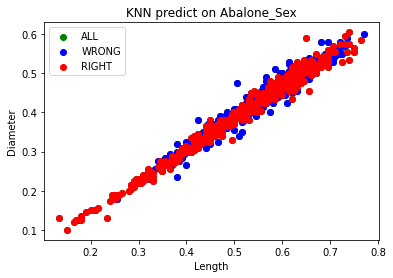

In [22]:
# 随机选取a和b作为坐标轴
#对Sex三个属性上色
plt.scatter(x = X_test['Length'], y = X_test['Diameter'], color = 'Green', label = 'ALL')
right = X_test[result1 == Y_test]
wrong = X_test[result1 != Y_test]
plt.scatter(x = wrong['Length'], y = wrong['Diameter'], color = 'blue', label = 'WRONG')
plt.scatter(x = right['Length'], y = right['Diameter'], color = 'red', label = 'RIGHT')

plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title("KNN predict on Abalone_Sex")
plt.legend()
plt.show()